## Exercise 5B - Lake 

In [1]:
# Imports
import bmi
import bmi.wrapper
import ipywidgets as widgets
from ipywidgets import HBox, VBox, interactive, Layout, interact
import numpy as np
import time
import os
# Something very fishy happening if I don't define a plot first.
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib notebook
import matplotlib.pyplot as plt
import sys
plt.ioff()
_ = plt.figure()
plt.ion()

# Toggle button for hiding the raw code
# from IPython.display import HTML
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [2]:
# sys.path.append("d:\checkouts\oss_trunk\src\bin\x64\share\bin")
# engine = r'd:\checkouts\oss_trunk\src\bin\x64\dflowfm\bin\dflowfm'
# mdufile = r'd:\projects\PAO_cursus\hyd_opp_water_2018\tests\c015_manning_schematic_river\manning_schematic_river.mdu'
# wrapper = bmi.wrapper.BMIWrapper(engine=engine);

# # Cindy
engine = r'C:\Users\vries_cy\OneDrive - Stichting Deltares\Desktop\DFM-old\share\bin\dflowfm'
wrapper = bmi.wrapper.BMIWrapper(engine=engine);
engine = r'C:\Users\vries_cy\OneDrive - Stichting Deltares\Desktop\DFM\x64\dflowfm\bin\dflowfm'
# mdufile = r'C:\Users\vries_cy\PAOTM cursus\river\manning_schematic_river.mdu'
#engine = r'C:\Users\vries_cy\OneDrive - Stichting Deltares\Desktop\DFM-old\share\bin\dflowfm'
#wrapper = bmi.wrapper.BMIWrapper(engine=engine);
# print(os.getcwd())
# engine = os.path.join(os.getcwd(),'..','..','x64','dflowfm','bin','dflowfm')
# print(engine)
mdufile = os.path.join(os.getcwd(),'..','PAO Models','Lake','w2_10lay.mdu')
# print(mdufile)

In [3]:
data = []
items = []
wrapper = bmi.wrapper.BMIWrapper(engine=engine, configfile=mdufile);
wrapper.initialize();
wrapper.update()

0

In [4]:
for i in range(wrapper.get_var_count()):
    print(wrapper.get_var_name(i), wrapper.get_var_shape(wrapper.get_var_name(i)))

b'DFM_COMM_DFMWORLD' ()
b'iglobal_s' (10000,)
b'hwav' (10000,)
b'twav' (10000,)
b'Uorb' (10000,)
b'infilt' (10000,)
b'infiltcap' (10000,)
b'shx' (0,)
b'shy' (0,)
b'shi' (0,)
b'zsp' (10000,)
b'zsp0' (10000,)
b'zspc' (10201,)
b'zspc0' (10201,)
b'v0ship' (10000,)
b'v1ship' (10000,)
b'qinship' (10000,)
b'vicushp' (19800,)
b'shL' (2,)
b'shB' (2,)
b'shd' (2,)
b'stuw' (2,)
b'fstuw' (2,)
b'stuwmx' (2,)
b'roer' (2,)
b'froer' (2,)
b'roermx' (2,)
b'wx' (19800,)
b'wy' (19800,)
b'wmag' (19800,)
b'rain' (10000,)
b'evap' (10000,)
b'numlatsg' ()
b'qplat' (0,)
b'qqlat' (10000,)
b'balat' (0,)
b'nnlat' (10000,)
b'qinext' (120000,)
b'qinextreal' (120000,)
b'vincum' (120000,)
b'zbndz' (0,)
b'zbndu' (0,)
b'zbndq' (0,)
b'rnveg' (120000,)
b'diaveg' (120000,)
b'cfuveg' (19800,)
b'alfaveg' (19800,)
b'stemdens' (10000,)
b'stemdiam' (10000,)
b'stemheight' (10000,)
b'zws' (120000,)
b'kbot' (10000,)
b'ktop' (10000,)
b'Lbot' (19800,)
b'Ltop' (19800,)
b's0' (10000,)
b's1' (10000,)
b'a0' (10000,)
b'a1' (10000,)
b'vol0

In [5]:
maxsteps = 100
parameters = []
# parameters = [
#     {
#         "parameter": "zbndz",
#         "description": "Boundary Water level Downstream $[m]$",
#         "default": 4
#     },    {
#         "parameter": "zbndq",
#         "description": "Boundary Discharge Upstream $[m^3/s]$",
#         "default": 1000
#     },    {
#         "parameter": "frcu",
#         "description": r"Roughness Chézy $[\sqrt{m}/s]$",
#         "default": str(wrapper.get_var("frcu")[0])
#     }
# ]

In [6]:
Z = wrapper.get_var_shape('ucx')
print(Z)

(120000,)


In [7]:
# Create widgets
style = {'description_width': 'initial'}

run = widgets.Button(
    description='Run model',
    button_style='',
    icon='play'
)
update = widgets.Button(
    description='Single update',
    button_style='',
    tooltip='Update with 1 timestep',
    icon='step-forward'
)
restart = widgets.Button(
    description='Restart model',
    button_style='',
    tooltip='Restart entire model with initial inputs',
    icon='retweet'
)

settings = widgets.HTML(
    value="Welcome!",
    placeholder='Input settings'
)

play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=int(wrapper.get_end_time()),
    step=1,
    description="Press play",
    disabled=False
)


nsteps = widgets.BoundedIntText(
    description="Number of timesteps",
    value=100,
    min=0,
    max=maxsteps,
    style=style,
    layout=Layout(width='15vw')
)

slider = widgets.IntSlider(  
    min=0,
    max=1,
    value=0
)

widgets.jslink((play, 'value'), (slider, 'value'))
player = widgets.HBox([play, slider])

# parameters = ["zbndz", "zbndq", "frcu"]
# p_descrip = ["Boundary Water level", "Boundary Discharge", "Roughness Chézy"]

items=[]
for p in parameters: 
    items.append(widgets.Text(
        description=p["description"],
        disabled=False,
        value=str(p["default"]),
        placeholder=p["parameter"],
        style=style,
        layout=Layout(width='50vw')
    ))

In [8]:
  
# Model specific function 
xz = wrapper.get_var('xz')[:]
yz = wrapper.get_var('yz')[:]
indy = np.argsort(yz)[::-1]
newx = xz[indy]

randind = np.random.choice(len(xz), int(len(xz)/5), replace=False)

lX = len(np.unique(xz))
lY = len(np.unique(yz))
newx = newx.reshape((lY, lX))
indx = np.argsort(newx, axis=1)

Z = int(wrapper.get_var_shape('ucx')[0] / (lX * lY))
print(Z)

xunq = np.unique(xz)
x_slice = np.tile(xunq, (Z, 1)).transpose()
XYshape = lX * lY
def grid2matrix(arr):
    new_arr = arr.copy()
    new_arr = new_arr[indy]
    new_arr = new_arr.reshape((lY, lX))

    c = np.zeros_like((new_arr))

    for i, x in enumerate(new_arr):
        c[i, :] = new_arr[i, indx[i]]
    return c

#     Automate parameter and grid sizes
def update_data():
    ucx = wrapper.get_var('ucx')[:]
    ucy = wrapper.get_var('ucy')[:]
    mag = wrapper.get_var('ucmag')[:]
    zws = wrapper.get_var('zws')[:]
    s1 = wrapper.get_var("s1")[:]
    
    new_mag = np.zeros((lX, lY, Z))
    new_zws = np.zeros((lX, lY, Z))
    for layer in range(Z-1):
        new_mag[:, :, layer] = grid2matrix(ucx[XYshape:][layer::11])
        new_zws[:, :, layer] = grid2matrix(zws[XYshape:][layer::11])
    
    UX = grid2matrix(ucx[XYshape:][0::11])
    UY = grid2matrix(ucy[XYshape:][0::11])
    
    data.append(dict({
        "time": wrapper.get_current_time(),
        "ucx": UX, 
        "ucy": UY, 
        "top_ucx": new_mag[:, :, 1],
        "slice_ucx": new_mag[:, 50, :], 
        "zws": new_zws[:, 50, :], 
        "top_s1": grid2matrix(s1.copy())
    }))
    slider.max = len(data)
    settings.value = "Model update, timestep: {}".format(data[-1]["time"])
update_data()


12


In [9]:
# plt.figure()
# plt.plot(xz, yz, '.')

In [10]:
zws = data[-1]["zws"]
xunq = np.unique(xz)
X = np.tile(xunq, (12, 1))
colors = data[-1]["slice_ucx"]
plt.figure()
a= plt.pcolormesh(X.transpose(), zws, colors);
plt.colorbar(a, cmap="seismic")

<IPython.core.display.Javascript object>

In [11]:
# print(list(wrapper.get_var('zws')[:]
#     ))

In [12]:
# # mag0 = wrapper.get_var('ucmag')[(lX*lY):][0:-1:11]
# # mag1 = wrapper.get_var('ucmag')[(lX*lY):][1:-2:11]

# # n = grid2matrix(mag1)
# plt.figure()
# plt.imshow(data[-1]["slice_ucx"].transpose())
# plt.colorbar()

In [13]:
# np.zeros((lX, lY, Z))

In [14]:
# plt.figure()
# ucx = wrapper.get_var('ucx')[:]
# ucy = wrapper.get_var('ucy')[:]
# mag = np.sqrt(ucx.copy()**2 + ucy.copy()**2)
# # vortscat = axs.scatter(xz, yz, marker="s", c=data[0]["magR"], vmin=0, vmax=2)

# sc = plt.scatter(xz, yz, c=mag)
# # plt.colorbar(sc)

In [15]:
# Standard functions for button widgets
dostop = False
def update_model(b=None):
#     Update the model with t = 1
    wrapper.update(wrapper.get_time_step())
    if(data[-1]["time"] != wrapper.get_current_time()):
        update_data()

def start_loop(n):
#     Start the loop for running the model continuously
#     while run.value == True: 
    for i in range(n):
        update_model()
        if (wrapper.get_current_time() >= wrapper.get_end_time()):
            stop_model()
            break
        if dostop == True: 
            stop_model()
            break
    stop_model()

def run_model(change=None): 
#     When the run/stop model button is pressed either start the model loop or stop it
    run.disabled = True
    update.disabled = True
    restart.disabled = True
    settings.disabled = True
    nsteps.disabled = True
    for i in items:
        i.disabled = True
    start_loop(int(nsteps.value))
#         thread = threading.Thread(target=start_loop)
#         thread.start()

def stop_model(change=None):
    update.disabled = False
    restart.disabled = False
    run.disabled = False
    nsteps.disabled = False
    for i in items:
        i.disabled = False
    dostop = True

def change_param(v):
    try:
        v = v.owner
    except AttributeError: 
        v = v
    if v.value == "":
        return
    try:
        float(v.value)
        old_par = wrapper.get_var(v.placeholder)
        new_par = np.ones_like(old_par) * float(v.value)
        wrapper.set_var(v.placeholder, new_par)
        settings.value = "Value ({}) has been set to: {}".format(v.description, new_par[0])
    except ValueError:
        v.value = str(next((x['default'] for x in parameters if x['parameter'] == v.placeholder), None))
        settings.value = "Not a correct input for {}".format(v.description)

def start_model():
#     start model
    wrapper = bmi.wrapper.BMIWrapper(engine=engine, configfile=mdufile)
    wrapper.initialize()
    update_data()
    for i in range(len(items)): 
        items[i].value = str(parameters[i]['default'])
        
def restart_model(b=None):
#     stop the model and call function to restart the model
    del data[:]
    slider.value = 0
    wrapper.finalize()
    start_model()
    settings.value = "Restarting model"

In [16]:
# plt.imshow()

<IPython.core.display.Javascript object>


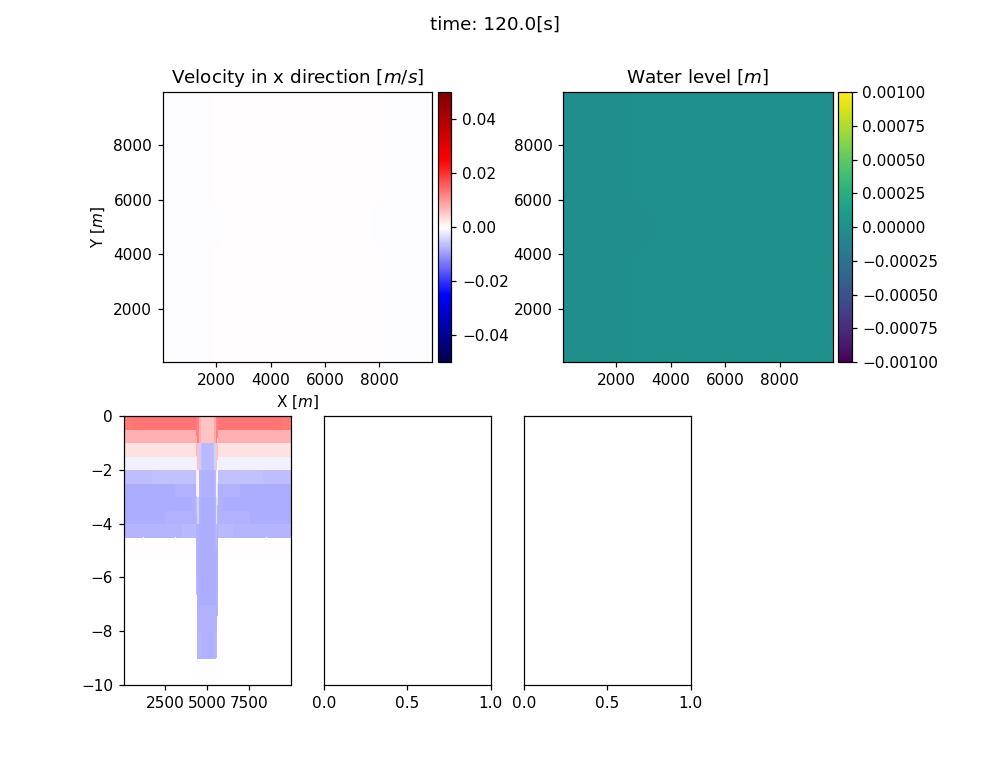

In [20]:
step = 1
# set plot size
plt.rcParams["figure.figsize"] = (9, 7) # (w, h)

# link functions to widgets
run.on_click(run_model)
update.on_click(update_model)
restart.on_click(restart_model)

def set_plot(change):
    t = change['new']
    if (t < len(data)):
        ux_top.set_data(data[t]["top_ucx"])
        s1_top.set_data(data[t]["top_s1"])
#         ux_side.set_array(data[t]["slice_ucx"])
#         vortscat.set_array(data[t]["magR"])
#         plt.title("time: " + str(data[t]["time"]) + "[s]")
#         quiver.set_UVC(data[t]["ucx"][randind], data[t]["ucy"][randind])
#         ax2.clear()
#         ax2.pcolormesh(x_slice, data[0]["zws"], data[0]["slice_ucx"], vmin=-0.05, vmax=0.05, cmap="seismic")
        t1.set_text("time: " + str(data[t]["time"]) + "[s]")
        fig.canvas.draw()
        
slider.observe(set_plot, 'value')

controls = HBox([run, update, restart])
params = VBox(items)

for i in items: 
    change_param(i)
    i.observe(change_param, names='value')

display(VBox([settings, HBox([nsteps, controls]), HBox([params])]))
fig = plt.figure()
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2)
ax1 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
ax2 = plt.subplot2grid((2, 4), (1, 0), rowspan=1)
ax3 = plt.subplot2grid((2, 4), (1, 1), rowspan=1)
ax4 = plt.subplot2grid((2, 4), (1, 2), rowspan=1)
display(player)

t1 = fig.suptitle("time: " + str(data[0]["time"]) + "[s]")

ux_top = ax0.imshow(data[0]["top_ucx"], extent=[xz.min(), xz.max(), yz.min(), yz.max()], vmin=-0.05, vmax=0.05, cmap="seismic")
ax0.set_xlabel("X $[m]$")
ax0.set_ylabel("Y $[m]$")
# quiver = ax1.quiver(xz[randind], yz[randind], data[0]["ucx"][randind], data[0]["ucy"][randind], angles='xy', scale_units='xy', scale=0.0001)
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(ux_top, cax=cax0);
ax0.set_title('Velocity in x direction $[m/s]$')

s1_top = ax1.imshow(data[0]["top_s1"], extent=[xz.min(), xz.max(), yz.min(), yz.max()], vmin=-0.001, vmax=0.001)
ax1.set_title('Water level $[m]$')
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cbar1 = plt.colorbar(s1_top, cax=cax1);

ux_side = ax2.pcolormesh(x_slice, data[0]["zws"], data[-1]["slice_ucx"], vmin=-0.05, vmax=0.05, cmap="seismic")
# divider2 = make_axes_locatable(ax2)
# cax2 = divider2.append_axes('right', size='5%', pad=0.05)
# cbar2 = plt.colorbar(ux_side, cax=cax2);


ax3.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)

plt.draw()


In [18]:

plt.figure()
# ux_side = 
# print(np.shape(x_slice), np.shape(data[0]["zws"]), np.shape(data[0]["slice_ucx"]))
ux_side = plt.pcolormesh(x_slice, data[0]["zws"], data[0]["slice_ucx"], cmap="seismic")
ux_side.set_facecolors(data[-1]["slice_ucx"])
plt.colorbar(ux_side)


<IPython.core.display.Javascript object>

ValueError: RGBA sequence should have length 3 or 4

In [ ]:
QuadMesh?

In [ ]:
# plt.figure()
# ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=3)
# ax2 = plt.subplot2grid((2, 3), (1, 0), rowspan=1)
# ax3 = plt.subplot2grid((2, 3), (1, 1), rowspan=1, sharey=ax2)
# ax3.yaxis.set_visible(False)
# ax4 = plt.subplot2grid((2, 3), (1, 2), rowspan=1, sharey=ax2)
# ax4.yaxis.set_visible(False)
